<a href="https://colab.research.google.com/github/ParthDhore/Comment-Classification/blob/main/ccdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Dataset**

Train Set


In [ ]:
data_frame = pd.read_json('/content/drive/MyDrive/ccdata/embold_train.json')

In [ ]:
train_df= pd.read_json("/content/drive/MyDrive/ccdata/embold_train.json").reset_index(drop=True)
train_df.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


Test Set


In [ ]:
test_df= pd.read_json("/content/drive/MyDrive/ccdata/embold_test.json").reset_index(drop=True)
test_df.head()

,title,body
0,config question path-specific environment var...,issue description or question\r \r hey @artemg...
1,crash indien vol,de simulator crasht als hij vol zit
2,unable to mine rocks,"sarkasmo starting today, when i hit enter act..."
3,not all whitelists are processed,create following rules... order of creation is...
4,add ctx menu for idafree 70 and idafree 5,"associated with .dll, .dll_, .exe, .exe_, .sc,..."


In [ ]:
train_ex_df= pd.read_json("/content/drive/MyDrive/ccdata/embold_train_extra.json").reset_index(drop=True)
train_ex_df.head()

,title,body,label
0,use a 8bit typeface,since this is meant to emulate some old arcade...,1
1,implement wireless m-bus binding,_from chris.pa...@googlemail.com https://cod...,1
2,add multilang support for timeago.js,currently it is only en . \r required to add ...,1
3,scaleway - seg-fault on shutdown,tbr irc creates a new scaleway instance with...,0
4,sistema de pintura: no se guardar los nuevos p...,este sp ya estaba asignado a un carro y se enc...,0


In [ ]:
def dataset_length_check(data_frame):
    print(len(data_frame),data_frame.index.shape[-1])
                 
dataset_length_check(train_df)
dataset_length_check(train_ex_df)
dataset_length_check(test_df)

150000 150000
300000 300000
30000 30000


Lengths of the sets are checked. The train_ex_df has extra data for training. We will concatenate it with train_df


In [ ]:
data_frame = pd.concat([train_df,train_ex_df],ignore_index=True)
data_frame=data_frame[:][:75000]
data_frame.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   75000 non-null  object
 1   body    75000 non-null  object
 2   label   75000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Total Counts of label column: 
 1    34613
0    33381
2     7006
Name: label, dtype: int64


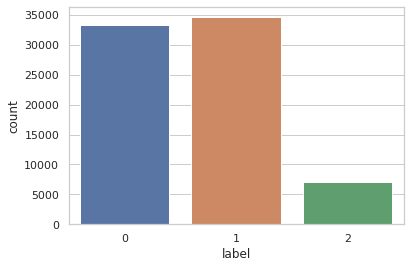

In [ ]:
print('Total Counts of label column: \n'.format(),data_frame['label'].value_counts())
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='label', data=data_frame)

In [ ]:
df_bug = data_frame[data_frame['label']==0]
df_feature = data_frame[data_frame['label']==1]
df_question = data_frame[data_frame['label']==2]

In [ ]:
label_counts = data_frame.label.value_counts().sort_index()
label_counts

0    33381
1    34613
2     7006
Name: label, dtype: int64

In [ ]:
def fx(x):
    return x['title'] + " " + x['body']   
data_frame['text']= data_frame.apply(lambda x : fx(x),axis=1)

**Counting the Labels: Bugs, Features and Questions**

In [ ]:
print('Number of datapoints with label as Bug :',label_counts[0])
print('Number of datapoints with label as Feature :',label_counts[1])
print('Number of datapoints with label as Question :',label_counts[2])

Number of datapoints with label as Bug : 33381
Number of datapoints with label as Feature : 34613
Number of datapoints with label as Question : 7006


**Cleaning the Text Field**

In [ ]:
import nltk
import re
import string
nltk.download("all")


def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
from string import punctuation
from nltk.corpus import stopwords

def remove_stopwords(git_text):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'a', 'r', 't', 'h']
    remove_punctuation = [ch for ch in git_text if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_git_text = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    filtered_git_text=" ".join(filtered_git_text)
    return filtered_git_text

**Visualizing the Data**

In [ ]:
data_frame['text'] = data_frame['text'].apply(lambda x: x.replace("\\r", ""))
data_frame['text'] = data_frame['text'].apply(lambda x: clean_text(x))
data_frame['text'] = data_frame['text'].apply(lambda x: remove_stopwords(x))
data_frame.head()

,title,body,label,text
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,yzoom piano roll yzoom piano roll would useful
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior selection screenshot
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,auto update feature hi great job far saenzrami...
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter noisy endpoints logs think stop logging...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid pid alarm actions expected behavior...


In [ ]:
data_frame.describe

<bound method NDFrame.describe of                                                    title  \
0                                      y-zoom piano roll   
1                            buggy behavior in selection   
2                                    auto update feature   
3                     filter out noisy endpoints in logs   
4      enable pid on / pid off alarm actions for ardu...   
...                                                  ...   
74995              predefining paths for robot to follow   
74996                  addpeer api accept duplicated url   
74997                            frequency slider  sf 23   
74998   allow anonymous users to access resident profile   
74999  how can you show them when they are on a scrol...   

                                                    body  label  \
0            a y-zoom on the piano roll would be useful.      1   
1      ! screenshot from 2016-02-23 21 27 40  https:/...      0   
2      hi,\r \r great job so far, @saenzrami

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import *
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
wordnet = WordNetLemmatizer()

In [ ]:
corpus=[]
for i in range(0, len(data_frame['text'])):
    comment=data_frame['text'][i]
    corpus.append(comment)
corpus[0]

'yzoom piano roll yzoom piano roll would useful'

In [ ]:
corpus

['yzoom piano roll yzoom piano roll would useful',
 'buggy behavior selection screenshot',
 'auto update feature hi great job far saenzramiro auto update feature would nice alternatively menu button check latest version manually',
 'filter noisy endpoints logs think stop logging requests health gtg faviconico',
 'enable pid pid alarm actions expected behavior alarm actions pid pid enable disable hardware pid platform rampsoak may also affected actual behavior pid state change alarm activates steps reproduce problem alarm handlers work awqmccontrolbuttonflag set sw awqmccontrolbuttonflag case handled pidon pidoff functions condition may able removed alarm handlers keep generalized pid types mainpy elif selfalarmaction alarmnumber rampsoak awqmcdevice awfujipid fuji pid awfujipidsetrampsoak elif awpidcontrol awqmccontrolbuttonflag internal external modbus pid control awpidcontrolsvmode awpidcontrolpidon elif selfalarmaction alarmnumber rampsoak awqmcdevice awfujipid fuji pid awfujipidset

In [ ]:
#Visualize and view the most common words in tweets
word_list=[word for line in corpus for word in line.split()]
count_words=Counter(word_list).most_common(50)
words=pd.DataFrame(count_words)
words.columns=['word','freq']
px.bar(words, x='word', y='freq', title='Most Common Words')

**The Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Embedding, SpatialDropout1D,Flatten

In [ ]:
#Initialize the Tensorflow Tokenizer
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data_frame['text'].values)
df_train,df_val=data_frame[data_frame["text"].eq("train")],data_frame[data_frame["label"].eq("validation")]

In [ ]:
data_frame['text']

0           yzoom piano roll yzoom piano roll would useful
1                      buggy behavior selection screenshot
2        auto update feature hi great job far saenzrami...
3        filter noisy endpoints logs think stop logging...
4        enable pid pid alarm actions expected behavior...
                               ...                        
74995    predefining paths robot follow hello according...
74996    addpeer api accept duplicated url tessera vers...
74997    frequency slider sf currently creating bluesyn...
74998    allow anonymous users access resident profile ...
74999    show scroll position hi want show slide scroll...
Name: text, Length: 75000, dtype: object

In [ ]:
voc_size = 3000# Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
epochs = 50  # Number of epochs to train the model for
batch = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 1000  # Maximum number of words in a sequence

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_frame.text,data_frame.label,test_size=0.1,random_state=42)

In [ ]:
#Tokenizing the preprocessed tweets, i.e. converting the text into vectors
tk = Tokenizer(num_words=voc_size,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [ ]:
X_train_seq

[[57,
  1154,
  42,
  188,
  36,
  40,
  72,
  688,
  291,
  68,
  2459,
  57,
  1154,
  42,
  725,
  2698,
  116,
  40,
  57,
  1154,
  42,
  644,
  1481,
  38,
  94,
  3,
  421,
  78,
  626,
  166,
  190,
  54,
  39,
  68,
  61,
  54,
  40,
  79,
  480,
  1349,
  688,
  257,
  57,
  1154,
  1,
  188,
  1195,
  257,
  1,
  188,
  1195,
  2698,
  1501],
 [846,
  1040,
  1740,
  2449,
  457,
  265,
  11,
  72,
  846,
  1040,
  846,
  469,
  244,
  2460,
  1569,
  1720,
  457,
  37,
  2550,
  981,
  846,
  2449,
  72,
  1040,
  80,
  1057,
  849,
  2221,
  846,
  457,
  2449,
  1477,
  457,
  2449,
  1477,
  457,
  2449,
  1477,
  999,
  2900,
  26,
  1219,
  999,
  999,
  2900,
  26,
  1219,
  999,
  999,
  2900,
  26,
  1219,
  999,
  2551,
  999,
  2900,
  26,
  1219,
  999],
 [390,
  2136,
  91,
  2120,
  26,
  51,
  49,
  1014,
  315,
  388,
  328,
  517,
  2120,
  26,
  5,
  148,
  92],
 [112, 68, 578, 112, 49, 805, 578, 88, 102, 1124, 212, 183, 38, 1710],
 [239,
  1274,
  239,
  2

In [ ]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [ ]:
X_train_seq_trunc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train, test_size=0.1, random_state=37)

In [ ]:
#Building the model with Embedding layer, LSTM(100 neurons) and a Dense Layer(3 neurons)
model = Sequential()
model.add(Embedding(voc_size, 8, input_length=MAX_LEN))
model.add(LSTM(100))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam'
                  , loss='sparse_categorical_crossentropy'
                  , metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 8)           24000     
                                                                 
 lstm (LSTM)                 (None, 100)               43600     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 67,903
Trainable params: 67,903
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train_emb, y_train_emb,epochs=epochs,batch_size=batch,validation_data=(X_valid_emb, y_valid_emb))

Epoch 1/50
119/119 [==============================] - 21s 114ms/step - loss: 0.8973 - accuracy: 0.5544 - val_loss: 0.7843 - val_accuracy: 0.6979
Epoch 2/50
119/119 [==============================] - 13s 110ms/step - loss: 0.6775 - accuracy: 0.7331 - val_loss: 0.6375 - val_accuracy: 0.7495
Epoch 3/50
119/119 [==============================] - 13s 111ms/step - loss: 0.6861 - accuracy: 0.7167 - val_loss: 0.6478 - val_accuracy: 0.7446
Epoch 4/50
119/119 [==============================] - 13s 113ms/step - loss: 0.5959 - accuracy: 0.7690 - val_loss: 0.6178 - val_accuracy: 0.7596
Epoch 5/50
119/119 [==============================] - 13s 112ms/step - loss: 0.6455 - accuracy: 0.7392 - val_loss: 0.6665 - val_accuracy: 0.7339
Epoch 6/50
119/119 [==============================] - 14s 120ms/step - loss: 0.5856 - accuracy: 0.7718 - val_loss: 0.6247 - val_accuracy: 0.7545
Epoch 7/50
119/119 [==============================] - 14s 115ms/step - loss: 0.5676 - accuracy: 0.7813 - val_loss: 0.6190 - val_ac

In [ ]:
model.evaluate(X_test_seq_trunc,y_test)

235/235 [==============================] - 4s 16ms/step - loss: 0.6535 - accuracy: 0.7572


[0.653464674949646, 0.7572000026702881]

In [ ]:
y_pred=model.predict(X_test_seq_trunc)

235/235 [==============================] - 5s 20ms/step


In [ ]:
y_pred

array([[0.8055477 , 0.18695864, 0.00749369],
       [0.32051393, 0.6700938 , 0.00939227],
       [0.9488575 , 0.04538701, 0.00575556],
       ...,
       [0.9060206 , 0.07886537, 0.01511408],
       [0.01858369, 0.9694746 , 0.01194163],
       [0.15658939, 0.635984  , 0.20742662]], dtype=float32)

In [ ]:
print(y_pred[0])
print(np.argmax(y_pred[0]))

[0.8055477  0.18695864 0.00749369]
0


In [ ]:
X_test.reset_index()
X_test.head()
y_test

26837    0
2592     0
18359    0
73292    1
60127    0
        ..
36682    1
52710    1
42507    0
4162     1
48941    1
Name: label, Length: 7500, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

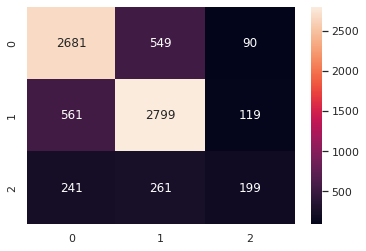

In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred.argmax(1))
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
f1=f1_score(y_test,y_pred.argmax(1),average=None)
f1

array([0.78818168, 0.78978555, 0.35888188])